<a href="https://colab.research.google.com/github/Spnetic-5/DSC_ML_Workshop/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initial Imports

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Simple Linear Regression

### Generate and Plot data

In [24]:
x = np.random.seed(0)

In [25]:
x = np.random.randn(100)
y = np.random.randint(-50,50) * x + np.random.randint(-20,20) + np.random.randn(100)

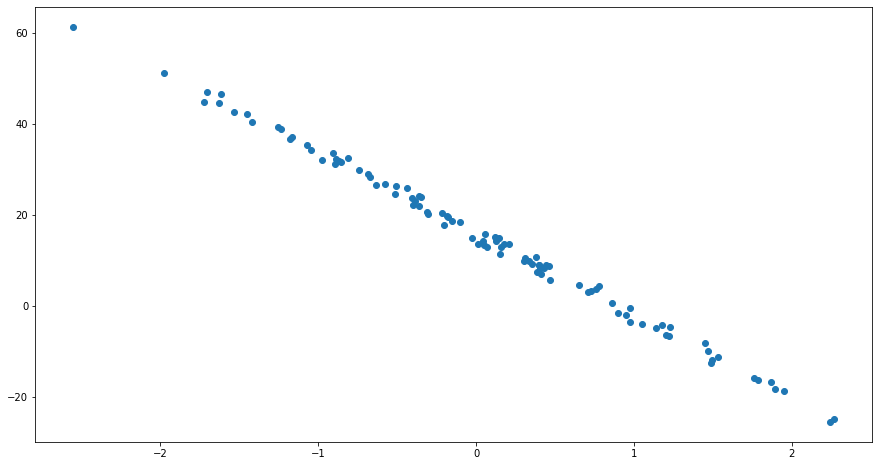

In [26]:
plt.figure(figsize=(15,8))
plt.scatter(x,y)
plt.show()

### Create Linear Regression Model

In [27]:
x_train, y_train, x_test, y_test = x[:75], y[:75], x[75:], y[75:]

In [28]:
from sklearn.linear_model import LinearRegression


In [29]:
model = LinearRegression()

In [30]:
model.fit(x_train.reshape(-1,1),y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
print(model.coef_, model.intercept_)

[-17.88541215] 16.0101006671455


### Plot best-fit line

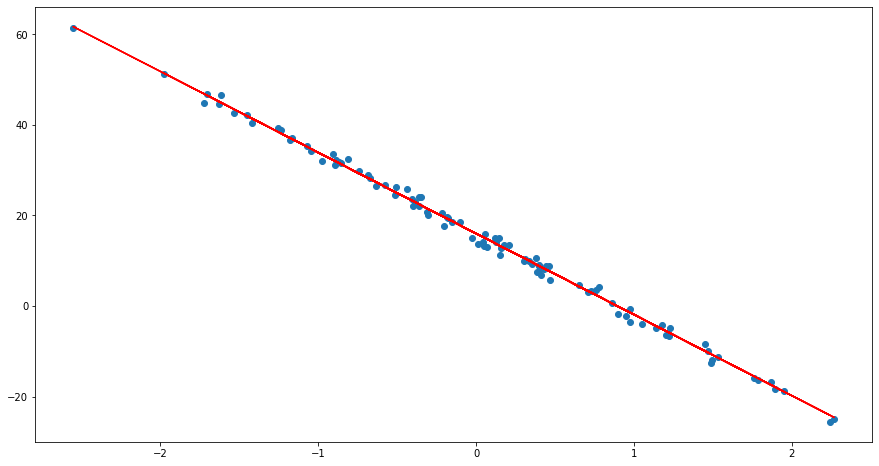

In [32]:
plt.figure(figsize=(15,8))
plt.scatter(x,y)
plt.plot(x, model.coef_ * x + model.intercept_, 'r')
plt.show()

In [33]:
y_preds = model.predict(x_test.reshape(-1,1))

In [34]:
from sklearn.metrics import r2_score

In [35]:
print(r2_score(y_test, y_preds) * 100)

99.59915567056046


# Multiple Linear Regression with Boston Housing Dataset

### Load the dataset

In [36]:
from sklearn.datasets import load_boston

In [37]:
dataset = load_boston()

In [38]:
print(dataset["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [42]:
X = pd.DataFrame(dataset["data"], columns=dataset["feature_names"])
y = pd.DataFrame(dataset["target"], columns=["Prices"])

In [44]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [48]:
X.drop(["CHAS"], axis=1, inplace=True)

### Explore the dataset

In [49]:
X.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [51]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   NOX      506 non-null    float64
 4   RM       506 non-null    float64
 5   AGE      506 non-null    float64
 6   DIS      506 non-null    float64
 7   RAD      506 non-null    float64
 8   TAX      506 non-null    float64
 9   PTRATIO  506 non-null    float64
 10  B        506 non-null    float64
 11  LSTAT    506 non-null    float64
dtypes: float64(12)
memory usage: 47.6 KB


### Train the model

In [50]:
from sklearn.model_selection import train_test_split

In [35]:
train_test_split()

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [53]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
print(model.coef_, model.intercept_)

[[-1.39305354e-01  4.04992922e-02  8.03111869e-02 -1.54679499e+01
   3.99530630e+00 -1.09359169e-02 -1.45601242e+00  2.71881784e-01
  -9.86865048e-03 -9.56604102e-01  1.27697458e-02 -5.68480456e-01]] [33.09041387]


In [55]:
y_pred = model.predict(X_test)

### Show model accuracy

In [59]:
y_pred = model.predict(X_test)

In [60]:
print(r2_score(y_test, y_pred) * 100)

72.55157994223468


# Polynomial Regression

### Generate and Plot Data

In [62]:
x = np.random.randn(100)
y = np.random.randint(-10,10) * (x ** 3) + np.random.randint(-30,30) + np.random.randn(100)

[]

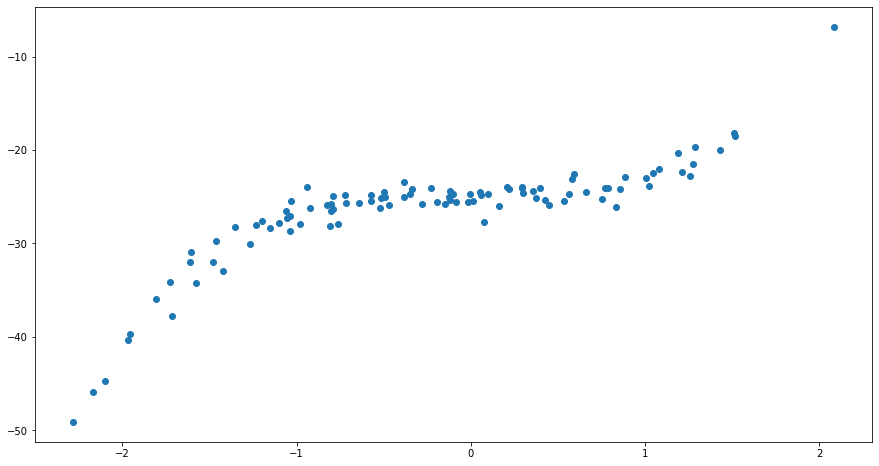

In [63]:
plt.figure(figsize=(15, 8))
plt.scatter(x,y)
plt.plot()

### Train a linear model

In [64]:
x_train, y_train, x_test, y_test = x[:75], y[:75], x[:75], y[:75]

In [66]:
model.fit(x_train.reshape(-1,1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

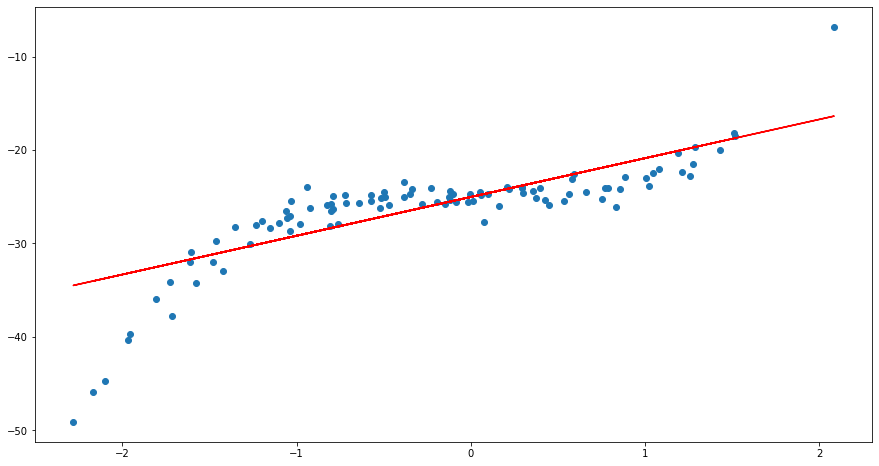

In [67]:
plt.figure(figsize=(15,8))
plt.scatter(x,y)
plt.plot(x, model.coef_ * x + model.intercept_, 'r')
plt.show()

In [68]:
print(r2_score(y_test, model.predict(x_test.reshape(-1,1))) * 100)

66.72939223670092


### Train a polynomial model

In [77]:
# y = m1 * x1 ** 3 + m2 * x2 ** 4 + c

In [71]:
from sklearn.preprocessing import PolynomialFeatures

In [74]:
poly_reg = PolynomialFeatures(degree=3)

In [76]:
x_train = poly_reg.fit_transform(x_train.reshape(-1,1))

In [78]:
x_train = pd.DataFrame(x_train)

In [79]:
x_train.head()

,0,1,2,3
0,1.0,1.256571,1.578972,1.984091
1,1.0,0.296747,0.088059,0.026131
2,1.0,0.398586,0.158871,0.063324
3,1.0,-1.053174,1.109176,-1.168156
4,1.0,-0.639476,0.408930,-0.261501


In [80]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [86]:
print(model.coef_, model.intercept_)

[ 0.         -0.11413339 -0.00977924  1.98885615] -25.075367294789178


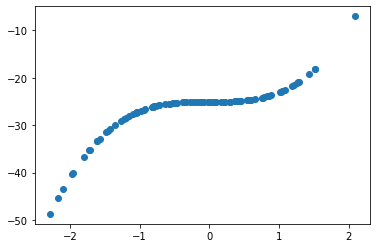

In [92]:
plt.scatter(x, model.coef_[3] * (x**3) + model.intercept_)

In [94]:
y_preds = model.predict(poly_reg.fit_transform(x_test.reshape(-1,1)))


In [89]:
print(r2_score(y_test, y_preds) * 100)

95.01473696629404
